In [ ]:
from google.colab import drive # this is how I loaded the data in today. run this code and create a shortcut in your google drive for this folder 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import csv

In [ ]:
#import ys from BART model
data_y = pd.read_csv("/content/drive/MyDrive/ML Project/Output/bart_output.csv")
data_y.describe()

,subject_id,y_pred_bart,y_true
count,3191.000000,3191.000000,3191.000000
mean,499666.061736,-0.852054,-0.857436
std,291684.227591,0.417036,0.944191
min,329.000000,-3.448108,-8.056765
25%,246779.500000,-1.089969,-1.257713
50%,499325.000000,-0.817944,-0.691742
75%,752560.000000,-0.579968,-0.252065
max,999990.000000,2.863131,7.609167


In [ ]:
y_rf = pd.read_csv("/content/drive/MyDrive/ML Project/Output/random_forest_output.csv",index_col=0)
y_rf.describe()

,subject_id,y_pred,y_true
count,3191.000000,3191.000000,3191.000000
mean,499666.061736,-0.863373,-0.857436
std,291684.227591,0.365476,0.944191
min,329.000000,-2.613001,-8.056765
25%,246779.500000,-1.079892,-1.257713
50%,499325.000000,-0.827520,-0.691742
75%,752560.000000,-0.598637,-0.252065
max,999990.000000,0.579379,7.609167


In [ ]:
y_boost = pd.read_csv("/content/drive/MyDrive/ML Project/Output/XGBoost_output.csv",index_col=0)
y_boost.describe()

,subject_id,y_pred,y_true
count,3191.000000,3191.000000,3191.000000
mean,499666.061736,-0.863036,-0.857436
std,291684.227591,0.150693,0.944191
min,329.000000,-1.661942,-8.056765
25%,246779.500000,-0.941325,-1.257713
50%,499325.000000,-0.842414,-0.691742
75%,752560.000000,-0.759743,-0.252065
max,999990.000000,-0.076561,7.609167


In [ ]:
y_lasso = pd.read_csv("/content/drive/MyDrive/ML Project/Output/Lasso_output.csv",index_col=0)
y_lasso.describe()

,y_true,y_pred_lasso
count,3191.000000,3191.000000
mean,-0.857436,-0.850287
std,0.944191,0.268672
min,-8.056765,-1.976700
25%,-1.257713,-1.022970
50%,-0.691742,-0.856365
75%,-0.252065,-0.678113
max,7.609167,0.974256


In [ ]:
y_SVR = pd.read_csv("/content/drive/MyDrive/ML Project/Output/NuSVR_output.csv",index_col=0)
y_SVR.describe()

,subject_id,y_pred,y_true
count,3191.000000,3191.000000,3191.000000
mean,499666.061736,-0.781365,-0.857436
std,291684.227591,0.276547,0.944191
min,329.000000,-1.894830,-8.056765
25%,246779.500000,-0.962045,-1.257713
50%,499325.000000,-0.767225,-0.691742
75%,752560.000000,-0.586098,-0.252065
max,999990.000000,0.145488,7.609167


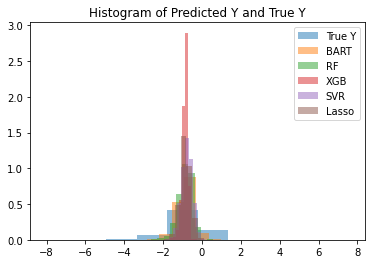

In [ ]:
#overlaying histogram
import matplotlib.pyplot as plt
import seaborn as sns
# plotting histograms
plt.hist(data_y['y_true'], density=True, alpha=0.5, label='True Y')
plt.hist(data_y['y_pred_bart'], density=True, alpha=0.5, label='BART')
plt.hist(y_rf['y_pred'], density=True, alpha=0.5, label='RF')
plt.hist(y_boost['y_pred'], density=True, alpha=0.5, label='XGB')
plt.hist(y_SVR['y_pred'], density=True, alpha=0.5, label='SVR')
plt.hist(y_lasso['y_pred_lasso'], density=True, alpha=0.5, label='Lasso')
  
plt.legend(loc='upper right')
plt.title('Histogram of Predicted Y and True Y')
plt.show()

In [ ]:
valid1 = pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/median imputer/validation_impute_median_norm.csv")
valid1['slope_following_9_months'].describe()

count    1053.000000
mean       -0.871951
std         0.963875
min        -6.522143
25%        -1.307096
50%        -0.668938
75%        -0.241561
max         4.348095
Name: slope_following_9_months, dtype: float64

In [ ]:
#check classification
#cut off -1.1, -0.5
filters = [
   (data_y.y_true <-1.1),
   (data_y.y_true <-0.5),
   (data_y.y_true >= -0.5)
]
values = ["fast", "average", "slow"]
data_y['y_true_class']=np.select(filters,values)
data_y['y_true_class'].value_counts() #slow: 1219, fast 983, medium 989

slow       1219
average     989
fast        983
Name: y_true_class, dtype: int64

In [ ]:
filters = [
   (data_y.y_pred_bart <-1.1),
   (data_y.y_pred_bart <-0.5),
   (data_y.y_pred_bart >= -0.5)
]
values = ["fast", "average", "slow"]
data_y['y_pred_class']=np.select(filters,values)
data_y['y_pred_class'].value_counts() #slow: 569, fast 775, medium 1847

average    1847
fast        775
slow        569
Name: y_pred_class, dtype: int64

In [ ]:
#save a copy of data_y
data_y_copy=data_y

##Tables: Test set (valid1)

In [ ]:
#subset to validation
data_y=data_y.loc[data_y['subject_id'].isin(valid1['subject_id']),:]

In [ ]:
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'])

y_pred_class,fast,medium,slow
y_true_class,,,
fast,139,176,16
medium,70,192,39
slow,48,272,101


In [ ]:
#row percentage
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'],normalize='index')

y_pred_class,fast,medium,slow
y_true_class,,,
fast,0.419940,0.531722,0.048338
medium,0.232558,0.637874,0.129568
slow,0.114014,0.646081,0.239905


In [ ]:
#total percentage
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'],normalize='all',margins=True, margins_name='Total')

y_pred_class,fast,medium,slow,Total
y_true_class,,,,
fast,0.132004,0.167142,0.015195,0.31434
medium,0.066477,0.182336,0.037037,0.28585
slow,0.045584,0.258310,0.095916,0.39981
Total,0.244065,0.607787,0.148148,1.00000


In [ ]:
#by -1.1 to identify fast
data_y['y_true_f']=pd.cut(data_y['y_true'],[-10,-1.1,10],labels=['Fast','Not Fast'])
data_y['y_pred_f']=pd.cut(data_y['y_pred_bart'],[-10,-1.1,10],labels=['Fast','Not Fast'])

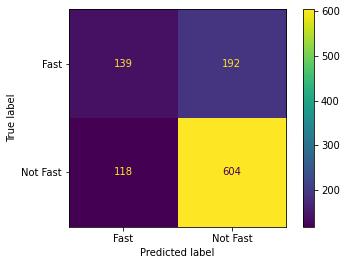

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cm = confusion_matrix(data_y['y_true_f'],data_y['y_pred_f'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Fast','Not Fast'])
disp.plot()
plt.show()

##Tables: remove outliers

In [ ]:
#subset to validation and remove outliers
data_y=data_y.loc[data_y['subject_id'].isin(valid1['subject_id']),:]
sd_ytrue=np.std(data_y['y_true'])
data_y=data_y.loc[(data_y['y_true']<=3*sd_ytrue) & (data_y['y_true']>=-3*sd_ytrue)]

In [ ]:
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'])

y_pred_class,average,fast,slow
y_true_class,,,
average,192,70,39
fast,161,119,12
slow,272,46,101


In [ ]:
#row percentage
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'],normalize='index')

y_pred_class,average,fast,slow
y_true_class,,,
average,0.637874,0.232558,0.129568
fast,0.551370,0.407534,0.041096
slow,0.649165,0.109785,0.241050


In [ ]:
#total percentage
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'],normalize='all',margins=True, margins_name='Total')

y_pred_class,average,fast,slow,Total
y_true_class,,,,
average,0.189723,0.069170,0.038538,0.297431
fast,0.159091,0.117589,0.011858,0.288538
slow,0.268775,0.045455,0.099802,0.414032
Total,0.617589,0.232213,0.150198,1.000000


In [ ]:
#by -1.1 to identify fast
data_y['y_true_f']=pd.cut(data_y['y_true'],[-10,-1.1,10],labels=['Fast','Not Fast'])
data_y['y_pred_f']=pd.cut(data_y['y_pred_bart'],[-10,-1.1,10],labels=['Fast','Not Fast'])

In [ ]:
pd.crosstab(data_y['y_true_f'],data_y['y_pred_f'],margins=True, margins_name='Total')

y_pred_f,Fast,Not Fast,Total
y_true_f,,,
Fast,119,173,292
Not Fast,116,604,720
Total,235,777,1012


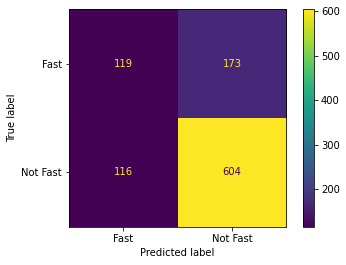

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cm = confusion_matrix(data_y['y_true_f'],data_y['y_pred_f'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Fast','Not Fast'])
disp.plot()
plt.show()